In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [2]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import seaborn as sns
import json
import requests
import folium

In [3]:
url = 'https://www.ncsl.org/research/labor-and-employment/state-unemployment-update.aspx'

In [13]:
df = pd.read_html(url)[0]
type(df)
df.head()

,State,Jan.,Feb.,March,April,May,June,July,Aug.,Sept.,Oct.,Nov.,Dec.
0,Alabama,4.3,4.0,3.8,3.6,3.4,3.3,3.2,3.1,3.1,3.1,3.1,3.1
1,Alaska,6.6,6.6,6.6,6.7,6.6,6.6,6.6,6.4,6.3,6.1,6.0,5.7
2,Arizona,6.7,6.9,6.7,6.7,6.7,6.8,6.6,6.2,5.7,5.2,4.7,4.1
3,Arkansas,4.6,4.5,4.4,4.4,4.4,4.4,4.3,4.2,4.0,3.7,3.4,3.1
4,California,9.0,8.5,8.3,8.3,7.9,7.7,7.6,7.5,7.5,7.3,6.9,6.5


In [15]:
df = df.set_index('State').transpose()

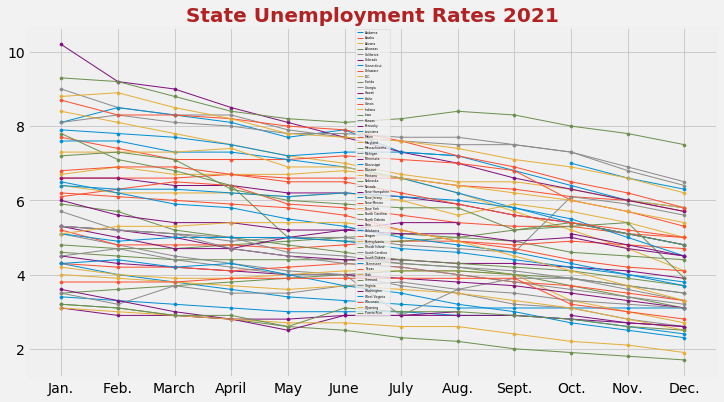

In [29]:
plt.figure(figsize=(11, 6), facecolor='0.95', )
plt.title('State Unemployment Rates 2021', fontsize=20, color='firebrick', weight='semibold')
x = list(df.index)
for s in df.columns: #state
    pass
    y = df[s]
    plt.scatter( x, y, s=10 )
    plt.plot( x, y, linewidth=1 )
plt.legend(df.columns, fontsize=3)
plt.show()    